In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np


In [2]:
def plot_decision_regions_2class(model, data_set):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#00AAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#00AAFF'])
    X = data_set.x.numpy()
    Y = data_set.y.numpy()
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.1 , X[:, 0].max() + 0.1 
    y_min, y_max = X[:, 1].min() - 0.1 , X[:, 1].max() + 0.1 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    XX = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    
    yhat = np.logical_not((model(XX)[:, 0] > 0.5).numpy()).reshape(xx.shape)
    plt.pcolormesh(xx, yy, yhat, cmap=cmap_light)
    plt.plot(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], 'o', label='y=0')
    plt.plot(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], 'ro', label='y=1')
    plt.title("decision region")
    plt.legend()

In [35]:
def accuracy(model, data_set):
    return np.mean(data_set.y.view(-1).numpy() == (model(data_set.x)[:,0] > 0.5).numpy())

In [24]:
def train(data_set, model, criterion, train_loader, optimizer, epochs = 5):
    COST = []
    ACC = []
    for epoch in range(epochs):
        total = 0
        for x, y in train_loader:
            optimizer.zero_grad()
            yhat = model(x)
            loss = criterion(yhat, y)
            loss.backward()
            optimizer.step()
            total += loss.item()
        if (epoch%50 == 0):
            print(f"Epoch {epoch}/{epochs}, Loss: {total}")
        
        ACC.append(accuracy(model, data_set))
        COST.append(total)
    
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.plot(COST, color=color)
    ax1.set_xlabel('epoch', color=color)
    ax1.set_ylabel('total loss', color=color)
    ax1.tick_params(axis='y', color=color)
    
    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('accuracy', color=color)  #we already handled the x-label with ax1
    ax2.plot(ACC, color=color)
    ax2.tick_params(axis='y', color=color)
    fig.tight_layout()  #otherwise the right y-label is slightly clipped
    
    plt.show()

    return COST
        

In [5]:
class XOR_data(Dataset):
    def __init__(self, N_s=100):
        self.x = torch.zeros((N_s, 2))
        self.y = torch.zeros((N_s, 1))
        for i in range(N_s // 4):
            self.x[i, :] = torch.Tensor([0.0, 0.0]) 
            self.y[i, 0] = torch.Tensor([0.0])

            self.x[i + N_s // 4, :] = torch.Tensor([0.0, 1.0])
            self.y[i + N_s // 4, 0] = torch.Tensor([1.0])
    
            self.x[i + N_s // 2, :] = torch.Tensor([1.0, 0.0])
            self.y[i + N_s // 2, 0] = torch.Tensor([1.0])
    
            self.x[i + 3 * N_s // 4, :] = torch.Tensor([1.0, 1.0])
            self.y[i + 3 * N_s // 4, 0] = torch.Tensor([0.0])

            self.x = self.x + 0.01 * torch.randn((N_s, 2))
        self.len = N_s

    def __getitem__(self, index):    
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len
    
    
    def plot_stuff(self):
        plt.plot(self.x[self.y[:, 0] == 0, 0].numpy(), self.x[self.y[:, 0] == 0, 1].numpy(), 'o', label="y=0")
        plt.plot(self.x[self.y[:, 0] == 1, 0].numpy(), self.x[self.y[:, 0] == 1, 1].numpy(), 'ro', label="y=1")
        plt.legend()

data_set = XOR_data()
data_set.plot_stuff()

In [7]:
class Model_Neuron1(nn.Module):
    def __init__(self, D_in, D_out):
        super(Model_Neuron1, self).__init__()
        self.linear1 = nn.Linear(D_in, 1)
        self.linear2 = nn.Linear(1, D_out)
        
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        return x

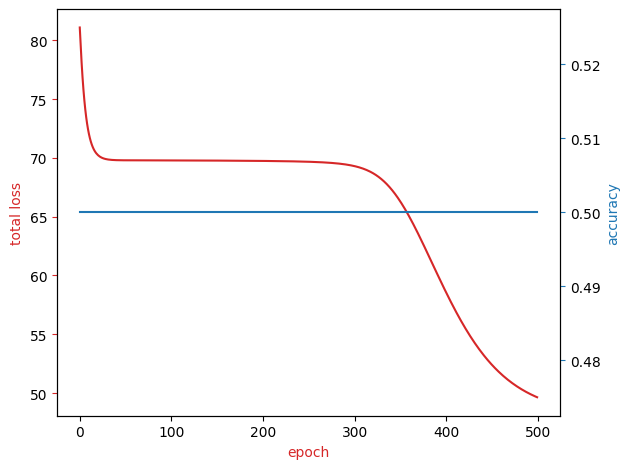

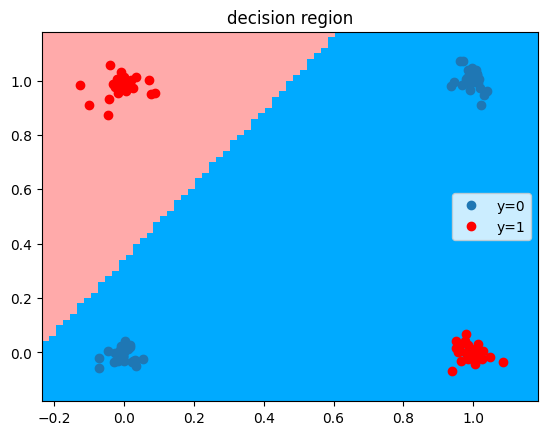

In [8]:
learning_rate = 0.001
model = Model_Neuron1(2, 1)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
criterion = nn.BCELoss()
train_loader = DataLoader(dataset = data_set, batch_size = 1)
LOSS_1 = train(data_set, model, criterion, train_loader, optimizer, epochs = 500)
plot_decision_regions_2class(model, data_set)

In [11]:
class Model_Neuron2(nn.Module):
    def __init__(self, D_in, D_out):
        super(Model_Neuron2, self).__init__()
        self.linear1 = nn.Linear(D_in, 2)
        self.linear2 = nn.Linear(2, D_out)
        
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        return x

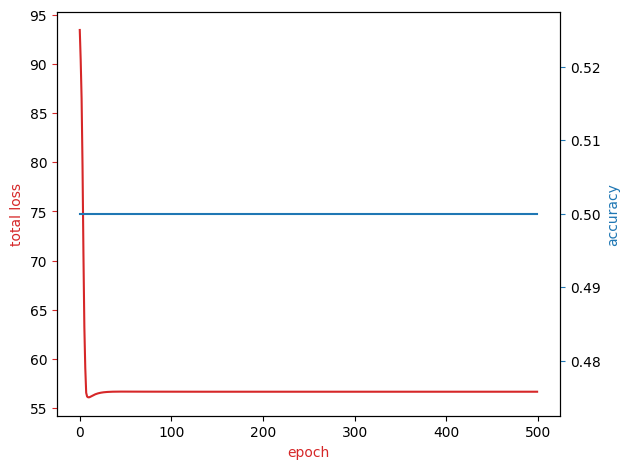

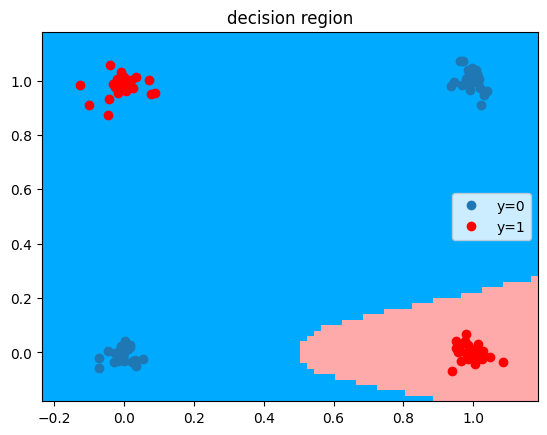

In [12]:
learning_rate = 0.1
model = Model_Neuron2(2, 1)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
criterion = nn.BCELoss()
train_loader = DataLoader(dataset = data_set, batch_size = 1)
LOSS_1 = train(data_set, model, criterion, train_loader, optimizer, epochs = 500)
plot_decision_regions_2class(model, data_set)

In [36]:
class Model_Neuron3(nn.Module):
    def __init__(self, D_in, D_out):
        super(Model_Neuron3, self).__init__()
        self.linear1 = nn.Linear(D_in, 3)
        self.linear2 = nn.Linear(3, D_out)
        
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        return x

Epoch 0/500, Loss: 88.93423927854747
Epoch 50/500, Loss: 56.67044264805918
Epoch 100/500, Loss: 56.66111493832727
Epoch 150/500, Loss: 56.659894627427875
Epoch 200/500, Loss: 56.659819618604935
Epoch 250/500, Loss: 56.659812310212956
Epoch 300/500, Loss: 56.65981201037285
Epoch 350/500, Loss: 56.65981200501797
Epoch 400/500, Loss: 56.659812004185255
Epoch 450/500, Loss: 56.65981200389305


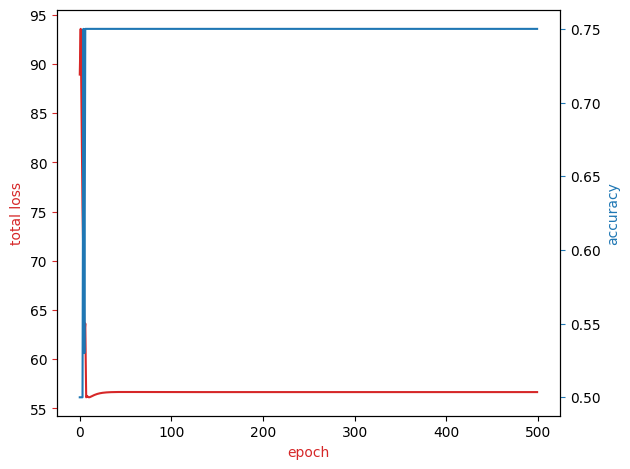

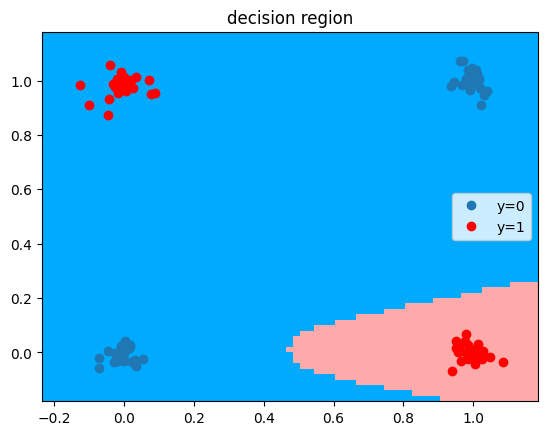

In [37]:
learning_rate = 0.1
model = Model_Neuron3(2, 1)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
criterion = nn.BCELoss()
train_loader = DataLoader(dataset = data_set, batch_size = 1)
LOSS_1 = train(data_set, model, criterion, train_loader, optimizer, epochs = 500)
plot_decision_regions_2class(model, data_set)

In [38]:
class Model_Neuron4(nn.Module):
    def __init__(self, D_in, D_out):
        super(Model_Neuron4, self).__init__()
        self.linear1 = nn.Linear(D_in, 4)
        self.linear2 = nn.Linear(4, D_out)
        
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        return x

Epoch 0/500, Loss: 91.05497898010071
Epoch 50/500, Loss: 56.67407617204299
Epoch 100/500, Loss: 56.66124386605293
Epoch 150/500, Loss: 1.2018766549055826
Epoch 200/500, Loss: 0.01826871628537674
Epoch 250/500, Loss: 0.0014072303257961494
Epoch 300/500, Loss: 0.00011514846237092868
Epoch 350/500, Loss: 9.113219894191227e-06
Epoch 400/500, Loss: 7.585777625773726e-07
Epoch 450/500, Loss: 1.9270047438291193e-07


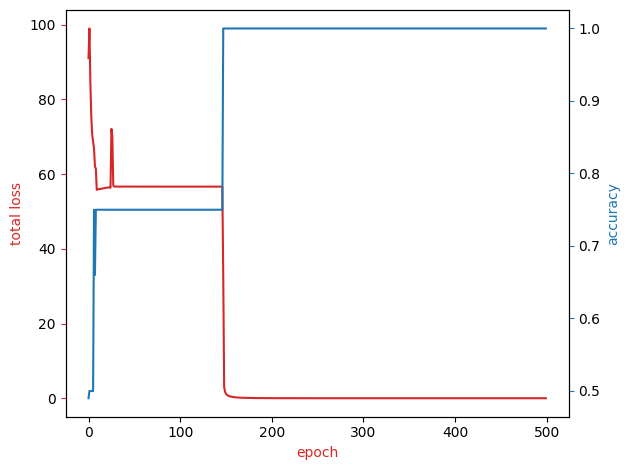

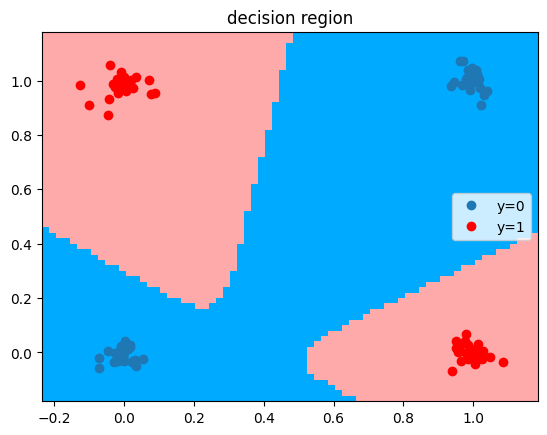

In [39]:
learning_rate = 0.1
model = Model_Neuron4(2, 1)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
criterion = nn.BCELoss()
train_loader = DataLoader(dataset = data_set, batch_size = 1)
LOSS_1 = train(data_set, model, criterion, train_loader, optimizer, epochs = 500)
plot_decision_regions_2class(model, data_set)